<a href="https://colab.research.google.com/github/minhong1126/data_analysis/blob/main/PhrasalVerb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/phrasalVerb.xlsx')

## 앞의 동사, ,숫자 제거
df['Verb'] = df['Verb'].str.split(',').str.get(0)
df['Verb'] = df['Verb'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df

,Verb
0,at
1,for
2,out
3,down
4,off
...,...
394,in
395,out
396,up
397,up


In [71]:
## 2word Verbs 선별 및 갯수 카운팅
twoDf = df[~df['Verb'].str.contains(' ')]
wordArr, cnt = np.unique(twoDf, return_counts=True)
twoWordCnt = pd.DataFrame({'Word': wordArr, 'Count': cnt})
twoWordCnt = twoWordCnt.sort_values(by='Count', ascending=False)
twoWordCnt

,Word,Count
29,up,74
22,out,64
20,off,40
17,in,25
14,down,24
21,on,22
23,over,15
10,back,14
7,around,11
15,for,11


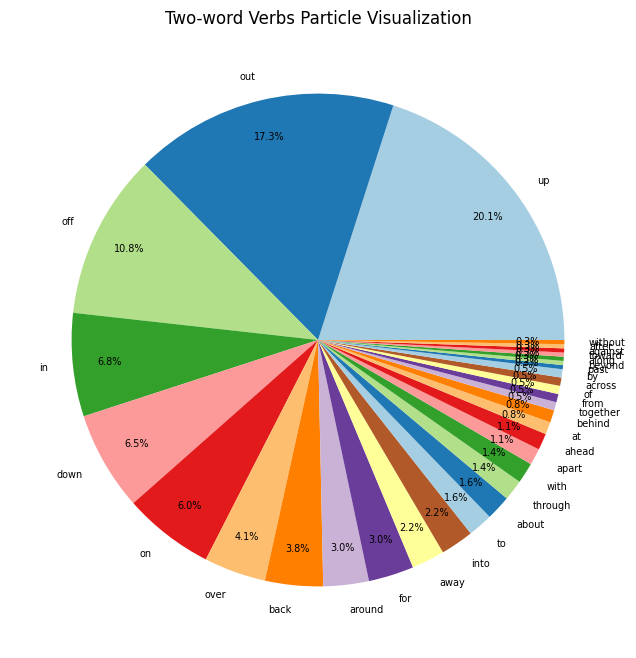

In [75]:
## 2-word particle 비율 시각화
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(twoWordCnt['Count'],
                                   labels=twoWordCnt['Word'],
                                   autopct='%1.1f%%',
                                   pctdistance=0.85,
                                   colors=plt.cm.Paired.colors)

for text in texts:
    text.set_fontsize(7)
for autotext in autotexts:
    autotext.set_fontsize(7)

plt.title('Two-word Verbs Particle Visualization')
plt.show()


In [73]:
## 3-word Verbs 선별
threeDf = df[df['Verb'].str.contains(' ')]

In [74]:
## 3-word Verb에서 첫 번째 particle 구별 및 갯수 카운팅
threeWordFir = threeDf['Verb'].str.split(' ').str.get(0)
wordArr, cnt = np.unique(threeWordFir, return_counts=True)
threeWordCntFir = pd.DataFrame({'Word': wordArr, 'Count': cnt})
threeWordCntFir = threeWordCntFir.sort_values(by='Count', ascending=False)
threeWordCntFir

,Word,Count
11,up,7
8,out,6
4,down,5
3,back,3
6,in,2
0,along,1
1,around,1
2,away,1
5,forward,1
7,off,1


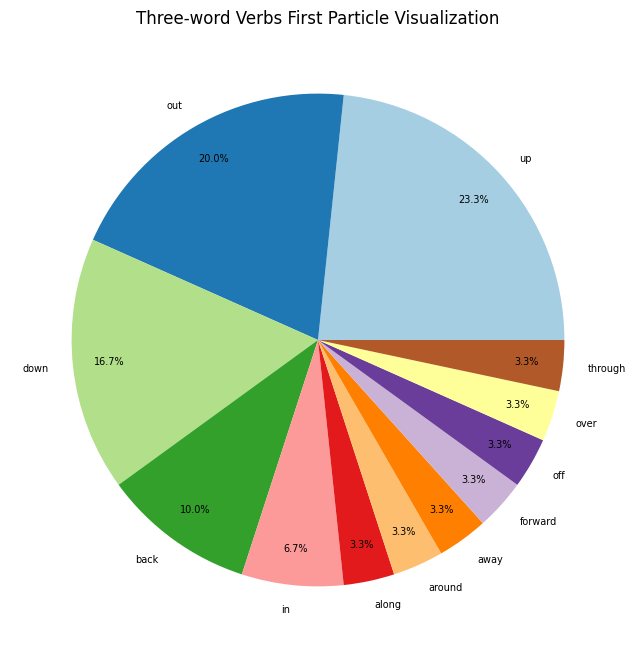

In [79]:
## 3-word first particle 비율 시각화
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(threeWordCntFir['Count'],
                                   labels=threeWordCntFir['Word'],
                                   autopct='%1.1f%%',
                                   pctdistance=0.85,
                                   colors=plt.cm.Paired.colors)

for text in texts:
    text.set_fontsize(7)
for autotext in autotexts:
    autotext.set_fontsize(7)

plt.title('Three-word Verbs First Particle Visualization')
plt.show()


In [80]:
## 3-word Verb에서 두 번째 particle 구별 및 갯수 카운팅
threeWordSec = threeDf['Verb'].str.split(' ').str.get(1)
wordArr, cnt = np.unique(threeWordSec, return_counts=True)
threeWordCntSec = pd.DataFrame({'Word': wordArr, 'Count': cnt})
threeWordCntSec = threeWordCntSec.sort_values(by='Count', ascending=False)
threeWordCntSec

,Word,Count
4,to,10
5,with,7
3,on,6
2,of,5
0,at,1
1,for,1


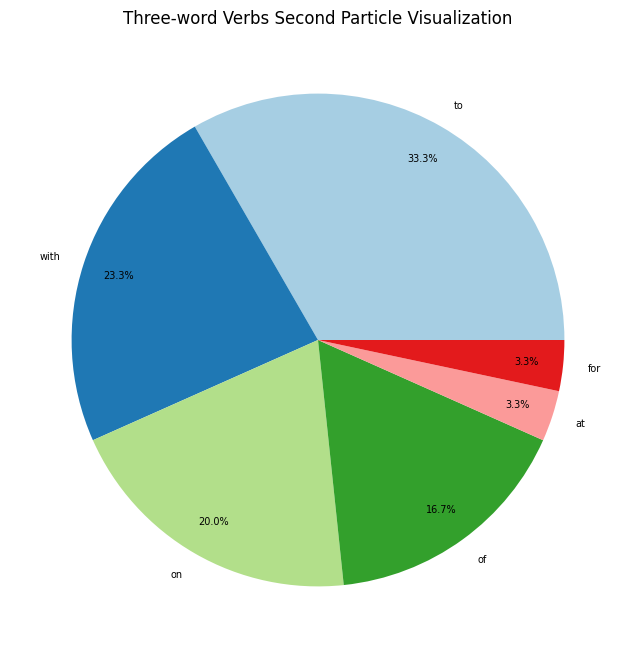

In [81]:
## 3-word second particle 비율 시각화
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(threeWordCntSec['Count'],
                                   labels=threeWordCntSec['Word'],
                                   autopct='%1.1f%%',
                                   pctdistance=0.85,
                                   colors=plt.cm.Paired.colors)

for text in texts:
    text.set_fontsize(7)
for autotext in autotexts:
    autotext.set_fontsize(7)

plt.title('Three-word Verbs Second Particle Visualization')
plt.show()

In [82]:
## 2-word, 3-word Verb의 particle 총합
combined_df = pd.concat([threeWordCntSec, threeWordCntFir, twoWordCnt])
result_df = combined_df.groupby('Word', as_index=False).sum()
result = result_df.sort_values(by='Count', ascending=False)
result

,Word,Count
30,up,81
23,out,70
21,off,41
14,down,29
22,on,28
18,in,27
10,back,17
24,over,16
27,to,16
31,with,12


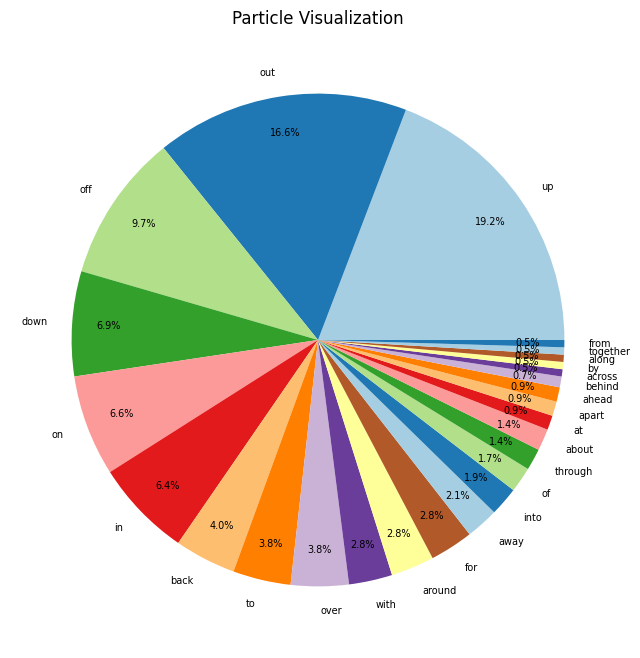

In [83]:
## 총합 시각화(가독성을 위해 2개 이상 사용된 것만 추가)
filteredResult_df = result_df[result_df['Count'] >= 2]
filteredResult_df = filteredResult_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(filteredResult_df['Count'],
                                   labels=filteredResult_df['Word'],
                                   autopct='%1.1f%%',
                                   pctdistance=0.85,
                                   colors=plt.cm.Paired.colors)

for text in texts:
    text.set_fontsize(7)
for autotext in autotexts:
    autotext.set_fontsize(7)

plt.title('Particle Visualization')
plt.show()